# K-NN  and Decision Tree Classification

### Dataset

As an example dataset, we will use the [pima indian diabetes dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names), which records measurements about several hundred patients and an indication of whether or not they tested positive for diabetes (the class label).  The classification is therefore to predict whether a patient will test positive for diabetes, based on the various measurements.


We first load in the dataset and randomly divide it into training and test sets.   We also normalise the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

##load in the data
pima=pd.read_csv('pima-indians-diabetes.csv',encoding = 'ISO-8859-1')

##get just the features
data=pima[['numpregnant','plasma','blood pressure','sf-thickness','serum-insulin','BMI','pedigree-function','age']].astype(float)


##get just the class labels
classlabel=pima['has_diabetes']

##randomly select 66% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.66, test_size=0.34, random_state=42)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)




We then fit a K-nearest neighbor classifier with K=5.
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [3]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

We then make predictions - for each of the test instances, we predict the class label using k-NN.   We compare our prediction with the actual class label and report the overall accuracy.

In [4]:
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7061068702290076


## Question 1
Draw a plot that shows varying k versus the prediction accuracy achieved by k-NN on the test set.  Based on your graph, what is the optimal k to use for this dataset?   How much better is this compared to a classifier that always make a prediction of 0 (not tested positive for diabetes)?

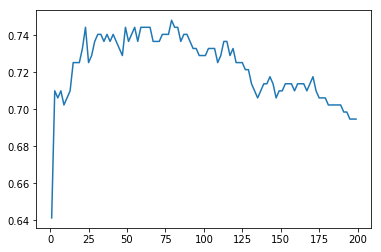

In [5]:
###Question 1 answer

### Interesting question : incease k to be X_train.shape[0], what does that tell you?

import numpy
ks = range(1,200,2)
accu_list=[]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_pred=knn.predict(X_test)
    accu_list.append(accuracy_score(y_test, y_pred))
    

plt.plot(ks,accu_list)
plt.show()

We now fit a [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).  To make the tree simple and easy to visualise, we enforce a maximum depth of 3.   

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Again we make predictions - for each of the test instances, we predict the class label.   We compare our prediction with the real class label and report the overall accuracy.

In [7]:
y_pred=dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7175572519083969


## Question 2
Draw a graph of decision tree classification accuracy as the size of the training set is varied between 10% and 90%.   For what training size is it the most accurate?  Why do you think this is the case?

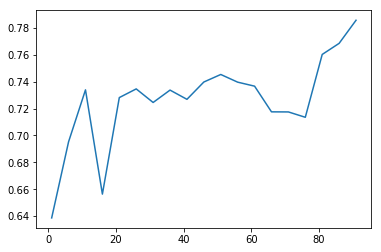

In [10]:
##Question 2 answer

splits = range(1,95,5)
accu_list=[]
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(data,classlabel,train_size=split/100,test_size=1-split/100,random_state=42)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    dt.fit(X_train, y_train)
    y_pred=dt.predict(X_test)
    accu_list.append(accuracy_score(y_test, y_pred))

plt.plot(splits,accu_list)
plt.show()

### Decision tree visualisation

The decision tree learned using 66% of the data is shown below.  The split condition is shown at the top of each node.  The true branch for the condition goes to the left and the false branch to the right.   The bottom line of each node shows the frequency of [negative, positive instances] in the node;

![Decision tree](mytree.png)


(For information only) The code to generate the tree visualisation is shown below.  It is commented out, since it is tricky to get the graphviz library installed and this is not currently working on the University lab machines.   If you are using a Mac on your home macine - one can use the "brew" package manager and then do "brew install graphviz".


#conda install -c anaconda graphviz=2.38.0 : to install dot command

In [9]:
from sklearn.tree import export_graphviz
from graphviz import Digraph
import graphviz

#export_graphviz(clf1.tree_, out_file='tree_d10.dot', feature_names=feat)
#export_graphviz(dt, out_file="mytree.dot",feature_names = data.columns,filled=True,rounded=True)

#from IPython.display import Image
#! dot -Tpng my_tree.dot -o tree_d10.png #use the 'dot' command to convert the .dot file to an image

#Image(filename='tree_d10.png')  # display the image.